#  این فایل جواب قسمت هفت سوال است

In [9]:
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

import pandas as pd

In [10]:
torch.manual_seed(42)

# train function

In [11]:

def train_model(X_train, y_train, X_test, y_test, input_size, hidden_size, output_size,
                loss_function, activation_function, optimizer, epochs=100):
    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the MLP model
    class MLP(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(MLP, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.activation = activation_function
            self.fc2 = nn.Linear(hidden_size, output_size)
            self.softmax = nn.Softmax(dim=1)

        def forward(self, x):
            x = self.fc1(x)
            x = self.activation(x)
            x = self.fc2(x)
            x = self.softmax(x)
            return x

    # Initialize the model
    model = MLP(input_size, hidden_size, output_size)

    # Define loss function and optimizer
    criterion = loss_function
    optimizer = optimizer(model.parameters(), lr=0.01)

    # Lists to store training and testing losses and accuracies
    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train_scaled, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train.values, dtype=torch.long))
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            test_outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32))
            test_loss = criterion(test_outputs, torch.tensor(y_test.values, dtype=torch.long))

        # Append losses to the lists
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())

        # Calculate accuracy and append to the list
        predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}, Test Loss: {test_loss.item()}, Accuracy: {accuracy}')

    # Evaluate the model
    with torch.no_grad():
        predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
       
    # Display various metrics
    print(" Display various metrics") 
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, predictions)}')
    print(f'Average Precision Score: {average_precision_score(y_test, predictions)}')

    # Plotting the training and testing losses
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss')
    plt.title('Training and Testing Losses Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotting the accuracy
    plt.plot(range(1, epochs + 1), accuracies, label='Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    


    


# Train the model with different activation functions

----------------------------------------------------------------
Training with Tanh
----------------------------------------------------------------
Epoch [1/100], Loss: 0.6985294222831726, Test Loss: 0.6862668991088867, Accuracy: 0.5476190476190477
Epoch [2/100], Loss: 0.6978013515472412, Test Loss: 0.6854497790336609, Accuracy: 0.5476190476190477
Epoch [3/100], Loss: 0.6970763802528381, Test Loss: 0.684636116027832, Accuracy: 0.5476190476190477
Epoch [4/100], Loss: 0.6963548064231873, Test Loss: 0.683825671672821, Accuracy: 0.5476190476190477
Epoch [5/100], Loss: 0.6956362724304199, Test Loss: 0.6830186247825623, Accuracy: 0.5476190476190477
Epoch [6/100], Loss: 0.6949211359024048, Test Loss: 0.6822147965431213, Accuracy: 0.5476190476190477
Epoch [7/100], Loss: 0.6942091584205627, Test Loss: 0.6814143061637878, Accuracy: 0.5476190476190477
Epoch [8/100], Loss: 0.6935003399848938, Test Loss: 0.680617094039917, Accuracy: 0.5476190476190477
Epoch [9/100], Loss: 0.6927946209907532, Test 

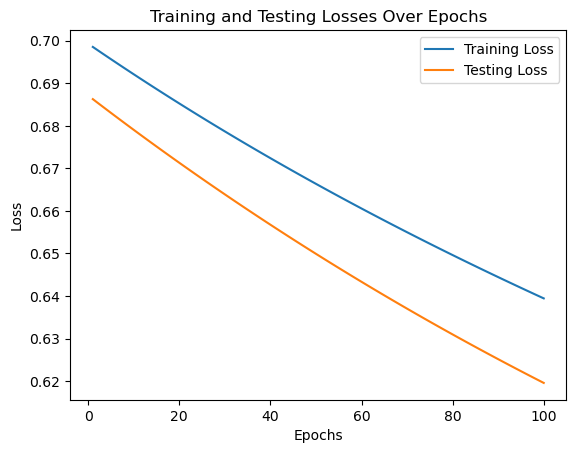

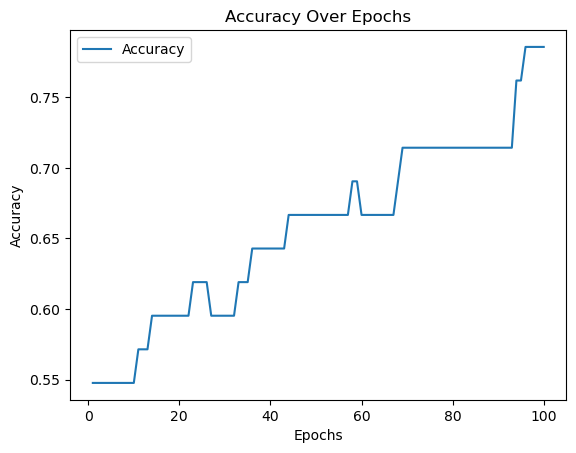

----------------------------------------------------------------
Training with Sigmoid
----------------------------------------------------------------
Epoch [1/100], Loss: 0.688803493976593, Test Loss: 0.6956518292427063, Accuracy: 0.40476190476190477
Epoch [2/100], Loss: 0.6886385679244995, Test Loss: 0.6952711343765259, Accuracy: 0.42857142857142855
Epoch [3/100], Loss: 0.6884750723838806, Test Loss: 0.6948935985565186, Accuracy: 0.42857142857142855
Epoch [4/100], Loss: 0.688312828540802, Test Loss: 0.6945193409919739, Accuracy: 0.42857142857142855
Epoch [5/100], Loss: 0.6881521940231323, Test Loss: 0.6941481232643127, Accuracy: 0.42857142857142855
Epoch [6/100], Loss: 0.6879928112030029, Test Loss: 0.6937800645828247, Accuracy: 0.42857142857142855
Epoch [7/100], Loss: 0.6878347396850586, Test Loss: 0.6934150457382202, Accuracy: 0.42857142857142855
Epoch [8/100], Loss: 0.6876779198646545, Test Loss: 0.6930531859397888, Accuracy: 0.42857142857142855
Epoch [9/100], Loss: 0.68752241134

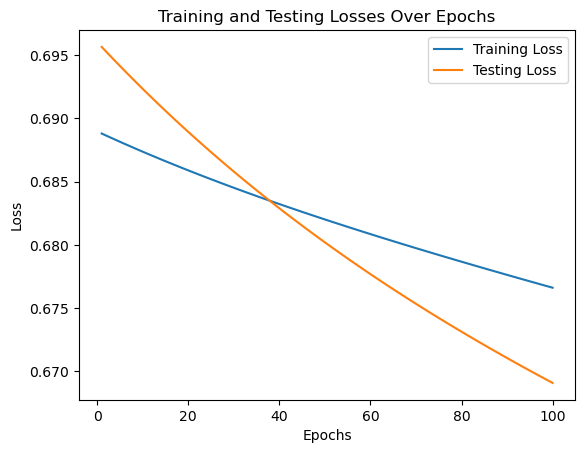

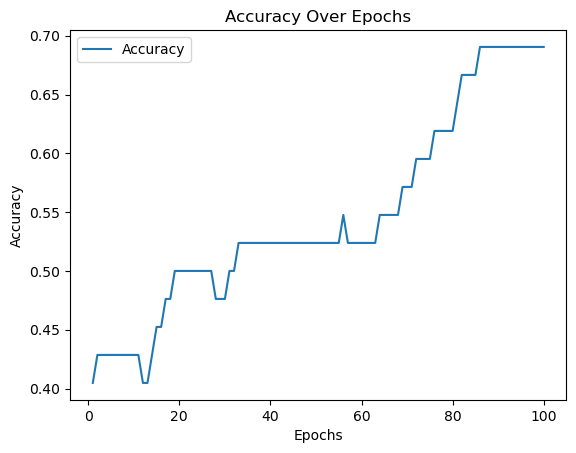

----------------------------------------------------------------
Training with ReLU
----------------------------------------------------------------
Epoch [1/100], Loss: 0.6942441463470459, Test Loss: 0.7116279006004333, Accuracy: 0.4523809523809524
Epoch [2/100], Loss: 0.6938178539276123, Test Loss: 0.7110158205032349, Accuracy: 0.4523809523809524
Epoch [3/100], Loss: 0.6933923959732056, Test Loss: 0.7104097008705139, Accuracy: 0.4523809523809524
Epoch [4/100], Loss: 0.6929707527160645, Test Loss: 0.7098068594932556, Accuracy: 0.4523809523809524
Epoch [5/100], Loss: 0.6925525665283203, Test Loss: 0.7092075347900391, Accuracy: 0.4523809523809524
Epoch [6/100], Loss: 0.6921364068984985, Test Loss: 0.7086100578308105, Accuracy: 0.4523809523809524
Epoch [7/100], Loss: 0.6917217373847961, Test Loss: 0.7080127000808716, Accuracy: 0.4523809523809524
Epoch [8/100], Loss: 0.6913082003593445, Test Loss: 0.7074180245399475, Accuracy: 0.4523809523809524
Epoch [9/100], Loss: 0.6908962726593018, Te

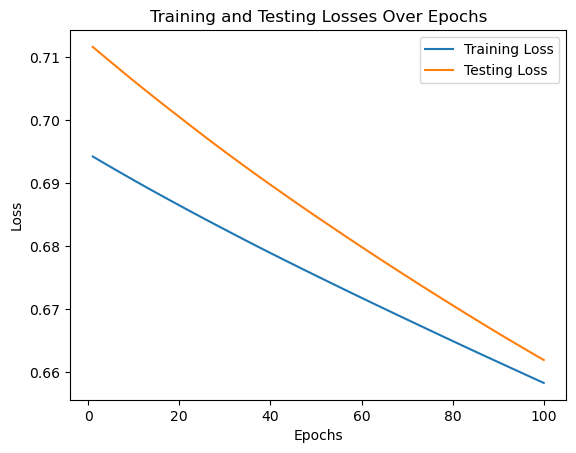

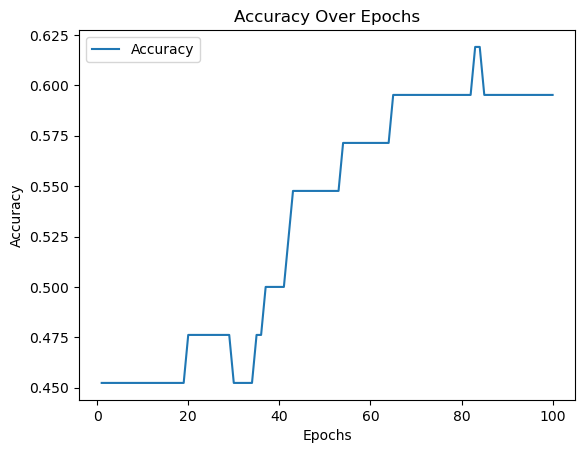

In [12]:


# Load data from the CSV file
file_path = "sonar.csv"
df = pd.read_csv(file_path, header=None)

# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert labels to numerical values
label_mapping = {'R': 0, 'M': 1}
y_numeric = y.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Specify model parameters
input_size = X_train.shape[1]
hidden_size = 30
output_size = 2  # Number of classes

# Specify loss functions, activation function, and optimizer
activation_functions =[nn.Tanh(), nn.Sigmoid(), nn.ReLU()]
optimizer = torch.optim.SGD
# Train the model with different activation functions
loss_function = nn.CrossEntropyLoss()

for activation_function in activation_functions:
    print("----------------------------------------------------------------")
    print(f"Training with {type(activation_function).__name__}")
    print("----------------------------------------------------------------")
    train_model(X_train, y_train, X_test, y_test, input_size, hidden_size, output_size,
                loss_function, activation_function, optimizer)
